In [2]:
import pandas as pd
import time
import io
import datetime
import sys
pd.set_option('max_colwidth',150)

### 1. Load the cleaned dataset

In [3]:
df=pd.read_pickle('df_Abstract_Unsupervised.pkl')
df.head(2)

Titre  \
0                       The basics of intravascular optical coherence tomography   
1  An eﬃcient orientation ﬁlter for inertial and inertial/magnetic sensor arrays   

                                                                                                                                                  Resume  \
0  Optical coherence tomography (OCT) has opened new horizons for intravascular coronary imaging. It utilizes near-infrared light to provide a micros...   
1  This report presents a novel orientation ﬁlter applicable to IMUs consisting of tri-axis gyroscopes and accelerometers, and MARG sensor arrays tha...   

                                                     URL  \
0  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4495121/   
1                                              #item_204   

                   Auteur  \
0          Roleder Tomasz   
1  Madgwick Sebastian O H   

                                                                                                                                              BagOfWords  
0  basics coherence tomography coherence tomography oct horizons imaging provide microscopic pathology arteries coherence tomography composition plaq...  
1  orientation ﬁlter sensor arrays report presents orientation imus gyroscopes accelerometers sensor arrays magnetometers implementation incorporates...

### 2. Extract a keyword dictionary that contains the most frequent words in the articles in the three rdf files

In [1]:
import nltk
stop_uk = nltk.corpus.stopwords.words('english')
stop_uk.extend(['paper', 'none', 'image'])

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = stop_uk, ngram_range=(2,2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [5]:
article_common_words = get_top_n_words(df.BagOfWords, 200)
keywords=[]
for word, freq in article_common_words:
    print(word, freq)
    keywords.append(word)

project management 99
project control 52
project performance 45
value management 44
process parameters 36
case study 35
cost schedule 31
maturity model 30
cash ﬂow 27
surface roughness 26
maturity models 26
project duration 25
construction projects 24
construction project 22
project cost 21
control system 20
schedule performance 20
software development 20
process control 19
management system 19
printing process 18
product quality 18
cost performance 18
management maturity 18
quality control 17
project managers 17
performance index 17
complexity management 17
manufacturing printing 16
cost time 16
life cycle 16
layer thickness 15
manufacturing processes 15
support vector 15
project selection 15
performance measurement 15
feedback control 14
point cloud 14
cash flow 14
performance project 14
control systems 13
surface quality 13
test parts 13
management information 13
schedule control 13
sensor data 12
development process 12
printer system 12
machine conditions 12
management evm 12
sched

### 3. Generate wordCloud to get a better idea about frequent words 

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
def createWordCloud(text):
    wc = WordCloud(stopwords=stop_uk, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

    wc.generate(text)

    plt.imshow(wc, interpolation="bilinear")
    plt.show()

There are 194422 words in the combination of all articles.


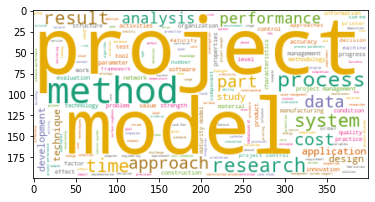

In [7]:
Allarticles= " ".join(words for words in df.BagOfWords)
print ("There are {} words in the combination of all articles.".format(len(Allarticles)))
createWordCloud(Allarticles)

###  4. Classify (cluster)  the articles according to the 200 most frequent words in all rdf

In [8]:
##### Calculate the tf-idf value for the keywords in the generated dataFrame
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(vocabulary=keywords,analyzer='word', ngram_range=(2,2), min_df = 2, stop_words = stop_uk,use_idf=True)

###### Get Tf-Idf values for keywords 

In [9]:
# get matrix of tf-idf values
matrix=tfidf.fit_transform(df.BagOfWords)
matrix

<391x200 sparse matrix of type '<class 'numpy.float64'>'
	with 1463 stored elements in Compressed Sparse Row format>

In [10]:
# get features value
features = tfidf.get_feature_names()
TfIdf = pd.DataFrame(matrix.toarray(),columns=features)
#Xtrain_TfIdf = pd.DataFrame(matrix,columns=features)
TfIdf.index = df.index
TfIdf.head(5)

project management  project control  project performance  value management  \
0                 0.0              0.0                  0.0               0.0   
1                 0.0              0.0                  0.0               0.0   
2                 0.0              0.0                  0.0               0.0   
3                 0.0              0.0                  0.0               0.0   
4                 0.0              0.0                  0.0               0.0   

   process parameters  case study  cost schedule  maturity model  cash ﬂow  \
0                 0.0         0.0            0.0             0.0       0.0   
1                 0.0         0.0            0.0             0.0       0.0   
2                 0.0         0.0            0.0             0.0       0.0   
3                 0.0         0.0            0.0             0.0       0.0   
4                 0.0         0.0            0.0             0.0       0.0   

   surface roughness  ...  cost project  managers project  cash ﬂows  \
0                0.0  ...           0.0               0.0        0.0   
1                0.0  ...           0.0               0.0        0.0   
2                0.0  ...           0.0               0.0        0.0   
3                0.0  ...           0.0               0.0        0.0   
4                0.0  ...           0.0               0.0        0.0   

   execution phase  project schedule  research project  \
0              0.0               0.0               0.0   
1              0.0               0.0               0.0   
2              0.0               0.0               0.0   
3              0.0               0.0               0.0   
4              0.0               0.0               0.0   

   performance monitoring  project project  cloud models  prediction project  
0                     0.0              0.0           0.0                 0.0  
1                     0.0              0.0           0.0                 0.0  
2                     0.0              0.0           0.0                 0.0  
3                     0.0              0.0           0.0                 0.0  
4                     0.0              0.0           0.0                 0.0  

[5 rows x 200 columns]

In [11]:
TfIdf.shape

(391, 200)

In [12]:
df_tfIdf = pd.concat([df, TfIdf], axis=1)
df_tfIdf.head(3)

Titre  \
0                             The basics of intravascular optical coherence tomography   
1        An eﬃcient orientation ﬁlter for inertial and inertial/magnetic sensor arrays   
2  Laser-Machined Shape Memory Alloy Sensors for Position Feedback in Active Catheters   

                                                                                                                                                  Resume  \
0  Optical coherence tomography (OCT) has opened new horizons for intravascular coronary imaging. It utilizes near-infrared light to provide a micros...   
1  This report presents a novel orientation ﬁlter applicable to IMUs consisting of tri-axis gyroscopes and accelerometers, and MARG sensor arrays tha...   
2  Catheter-based interventions are a form of minimally invasive surgery that can decrease hospitalization time and greatly lower patient morbidity c...   

                                                     URL  \
0  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4495121/   
1                                              #item_204   
2  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2598764/   

                   Auteur  \
0          Roleder Tomasz   
1  Madgwick Sebastian O H   
2       Tung Alexander T.   

                                                                                                                                              BagOfWords  \
0  basics coherence tomography coherence tomography oct horizons imaging provide microscopic pathology arteries coherence tomography composition plaq...   
1  orientation ﬁlter sensor arrays report presents orientation imus gyroscopes accelerometers sensor arrays magnetometers implementation incorporates...   
2  laser memory alloy sensors position catheters interventions surgery decrease hospitalization time morbidity methods catheter procedures tip manipu...   

   project management  project control  project performance  value management  \
0                 0.0              0.0                  0.0               0.0   
1                 0.0              0.0                  0.0               0.0   
2                 0.0              0.0                  0.0               0.0   

   process parameters  ...  cost project  managers project  cash ﬂows  \
0                 0.0  ...           0.0               0.0        0.0   
1                 0.0  ...           0.0               0.0        0.0   
2                 0.0  ...           0.0               0.0        0.0   

   execution phase  project schedule  research project  \
0              0.0               0.0               0.0   
1              0.0               0.0               0.0   
2              0.0               0.0               0.0   

   performance monitoring  project project  cloud models  prediction project  
0                     0.0              0.0           0.0                 0.0  
1                     0.0              0.0           0.0                 0.0  
2                     0.0              0.0           0.0                 0.0  

[3 rows x 205 columns]

## 5. ML (non supervisé)

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

standarize the tf-idf values for the Keywords

In [14]:
# On met dans train_num les variables numériques transformées en arrays
tfIdf_num = df_tfIdf.iloc[:, range(5, len(df_tfIdf.columns))]
# On change le format pour que scikitlearn tourne bien
tfIdf_numpy = tfIdf_num.to_numpy()
scaler=StandardScaler()
# On centre réduit
tfIdf_std = scaler.fit_transform(tfIdf_numpy)
tfIdf_std.shape

(391, 200)

### 1. Kmeans

Try to find the best number of clusters

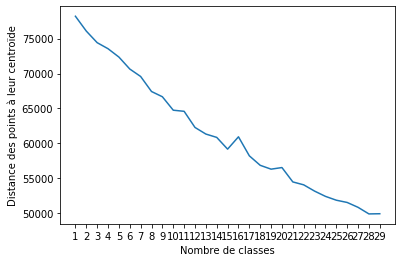

In [15]:
# On affiche le graphe de l'inertie en fonction du nb de clusters
liste_iner = [KMeans(k).fit(tfIdf_std).inertia_ for k in range(1, 30)]
plt.plot(range(1, 30), liste_iner)
plt.xlabel("Nombre de classes")
plt.ylabel("Distance des points à leur centroïde")
plt.xticks(ticks=range(1, 30))
plt.show()

In [16]:
# On choisit 25 classes
classes_from = KMeans(28).fit_predict(tfIdf_std)

In [17]:
#classes_from
# On affiche les résultats des classes et leurs noms
#pd.DataFrame(classes_from, X_train.iloc[:, 0]).head(20)
df_tfIdf=pd.DataFrame(df_tfIdf)
df_tfIdf['Cluster']=pd.Series(classes_from, index=df_tfIdf.index)

In [18]:
df_tfIdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 391 entries, 0 to 225
Columns: 206 entries, Titre to Cluster
dtypes: float64(200), int32(1), object(5)
memory usage: 630.8+ KB


In [19]:
df_tfIdf.head(2)

Titre  \
0                       The basics of intravascular optical coherence tomography   
1  An eﬃcient orientation ﬁlter for inertial and inertial/magnetic sensor arrays   

                                                                                                                                                  Resume  \
0  Optical coherence tomography (OCT) has opened new horizons for intravascular coronary imaging. It utilizes near-infrared light to provide a micros...   
1  This report presents a novel orientation ﬁlter applicable to IMUs consisting of tri-axis gyroscopes and accelerometers, and MARG sensor arrays tha...   

                                                     URL  \
0  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4495121/   
1                                              #item_204   

                   Auteur  \
0          Roleder Tomasz   
1  Madgwick Sebastian O H   

                                                                                                                                              BagOfWords  \
0  basics coherence tomography coherence tomography oct horizons imaging provide microscopic pathology arteries coherence tomography composition plaq...   
1  orientation ﬁlter sensor arrays report presents orientation imus gyroscopes accelerometers sensor arrays magnetometers implementation incorporates...   

   project management  project control  project performance  value management  \
0                 0.0              0.0                  0.0               0.0   
1                 0.0              0.0                  0.0               0.0   

   process parameters  ...  managers project  cash ﬂows  execution phase  \
0                 0.0  ...               0.0        0.0              0.0   
1                 0.0  ...               0.0        0.0              0.0   

   project schedule  research project  performance monitoring  \
0               0.0               0.0                     0.0   
1               0.0               0.0                     0.0   

   project project  cloud models  prediction project  Cluster  
0              0.0           0.0                 0.0        2  
1              0.0           0.0                 0.0        2  

[2 rows x 206 columns]

In [21]:
reslut=df_tfIdf.sort_values(['Cluster'])
reslut.head(2)

Titre  \
60   Impact of sensitivity information on the prediction of project's duration using earned schedule method   
134  Impact of sensitivity information on the prediction of project's duration using earned schedule method   

                                                                                                                                                    Resume  \
60   Recently, the prediction of project duration has been investigated in earned value management (EVM) using three earned value methods, planed value...   
134  Recently, the prediction of project duration has been investigated in earned value management (EVM) using three earned value methods, planed value...   

                                                                    URL  \
60        http://linkinghub.elsevier.com/retrieve/pii/S0263786312001378   
134  http://www.sciencedirect.com/science/article/pii/S0263786312001378   

             Auteur  \
60   Elshaer Raafat   
134  Elshaer Raafat   

                                                                                                                                                BagOfWords  \
60   sensitivity information prediction project duration schedule method prediction project duration value management evm value methods value pvm durat...   
134  sensitivity information prediction project duration schedule method prediction project duration value management evm value methods value pvm durat...   

     project management  project control  project performance  \
60                  0.0              0.0                  0.0   
134                 0.0              0.0                  0.0   

     value management  process parameters  ...  managers project  cash ﬂows  \
60           0.133292                 0.0  ...               0.0        0.0   
134          0.133292                 0.0  ...               0.0        0.0   

     execution phase  project schedule  research project  \
60               0.0               0.0               0.0   
134              0.0               0.0               0.0   

     performance monitoring  project project  cloud models  \
60                      0.0              0.0           0.0   
134                     0.0              0.0           0.0   

     prediction project  Cluster  
60             0.413119        0  
134            0.413119        0  

[2 rows x 206 columns]

In [22]:
reslut.to_csv('ClusterArticles_Kmeans.csv', index=False)